In [2]:
import pandas as pd
df = pd.read_excel("komentar_netizen.xlsx")
df.info

<bound method DataFrame.info of                                               Komentar
0          Dosen ketemu pertanyaan y jawabanny bagus,.
1    Coba perhatikan Anies, bukan senyum melaikan A...
2    Waktu kemarin debat pertama menurut saya pak A...
3    Nilai debat kemarin \nPaslon 1 = 120\nPaslom 2...
4    Suka banget lihat percakapan dan bahasa tubuh ...
..                                                 ...
370  Jawaban PRABOWO jelas sesuai pngalaman Beliau ...
371  bayi jg jdi pemimpin...asal ayah presiden kano...
372                                            ttep 02
373  jagoan lu no 2 levelnya rendah jadi kasih pert...
374  prabowo kebanyakan kata-kata saudara-saudara s...

[375 rows x 1 columns]>

Tokenizing

In [3]:
import re
import string
from nltk.tokenize import word_tokenize 

# case folding
df['Komentar'] = df['Komentar'].str.lower()

# menghilangkan replies tag username
def hilangkan_tag_username(teks):
    pola_username = r'@@\w+'
    teks_bersih = re.sub(pola_username, '', teks)
    return teks_bersih

df['Komentar'] = df['Komentar'].apply(hilangkan_tag_username)

# remove non ASCII character
def remove_non_ASCII(text):
    return text.encode('ascii', 'replace').decode('ascii')

df['Komentar'] = df['Komentar'].apply(remove_non_ASCII)

# remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)

df['Komentar'] = df['Komentar'].apply(remove_number)

# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

df['Komentar'] = df['Komentar'].apply(remove_punctuation)

# remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Komentar'] = df['Komentar'].apply(remove_whitespace_LT)

# remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

df['Komentar'] = df['Komentar'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Komentar'] = df['Komentar'].apply(remove_single_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['komentar_tokens'] = df['Komentar'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['komentar_tokens'].head())

Tokenizing Result : 

0        [dosen, ketemu, pertanyaan, jawabanny, bagus]
1    [coba, perhatikan, anies, bukan, senyum, melai...
2    [waktu, kemarin, debat, pertama, menurut, saya...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, dan, bahasa,...
Name: komentar_tokens, dtype: object


Stopword Removal

In [4]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

stopwords_indonesian = stopwords.words('indonesian')
stopwords_english = stopwords.words('english')

list_stopwords = stopwords_indonesian + stopwords_english + sastrawi_stopwords


list_stopwords.extend(
    ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 
     'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 
     'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n', 
     't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp', 'yah', 
     'lu', 'gw', 'pa', 'pk', 'jg', 'ttep', 'mef', 'tpat', 'jbol', 'bnr', 
     'kyk', 'mu', 'dlm', 'pret', 'kau', 'tp', 'knp', 'jdi', 'wonng', 'wkwk'
     'paslom', 'kau', 'nyakin', 'jembuttt','bla', 'badazzzz', 'btw', 'bapakkk', 
     'loveee','youuu','yaaa','pakkkkkk', 'dri', 'mksd', 'emhhh', 'fix', 'iyes', 'sok',
     'ato', 'woy', 'taw', 'klw', 'ttp', 'mnt', 'bro', 'byk', 'org', 'uda', 'aj'
     'amoh', 'dr', 'bg', 'bang', 'iya', 'ky', 'aq', 'yak', 'eh', 'phpin', 'ama',
     'ampe', 'hrs', 'oc', 'mak', 'ta', 'gk', 'fak', 'ehh', 'duh', 'lgi', 'sma', 
     'gue', 'gua', 'wooyyyyy', 'udh', 'kek', 'ja', 'wawdaw', 'ps', 'pa', 'ngab',
     'bong', 'bruh', 'lho', 'lur', 'ajj', 'gtu', 'ad', 'seh', 'bu', 'trs', 'mmg',
     'ni', 'mah', 'wkskw', 'bnr', 
    ]
)


# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['komentar_tokens_WSW'] = df['komentar_tokens'].apply(stopwords_removal) 

print(df['komentar_tokens_WSW'].head())

0                    [dosen, ketemu, jawabanny, bagus]
1    [coba, perhatikan, anies, senyum, melaikan, an...
2    [kemarin, debat, anies, bagus, kali, debat, ke...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, bahasa, tubu...
Name: komentar_tokens_WSW, dtype: object


Cleaning the dataset

In [5]:
# Gantikan nilai kosong dengan NaN
df.replace('', pd.NA, inplace=True)

# Gantikan nilai list kosong dengan NaN
df['komentar_tokens_WSW'] = df['komentar_tokens_WSW'].apply(lambda x: pd.NA if not x else x)

# Menghapus baris yang memiliki nilai NaN
df = df.dropna()

# Mereset indeks
df = df.reset_index(drop=True)

# Menampilkan DataFrame setelah perubahan
print(df)

                                              Komentar  \
0             dosen ketemu pertanyaan  jawabanny bagus   
1    coba perhatikan anies bukan senyum melaikan an...   
2    waktu kemarin debat pertama menurut saya pak a...   
3    nilai debat kemarin paslon paslom paslon ini n...   
4    suka banget lihat percakapan dan bahasa tubuh ...   
..                                                 ...   
345                               torizid buzzer receh   
346  jawaban prabowo jelas sesuai pngalaman beliau ...   
347      bayi jg jdi pemimpinasal ayah presiden kanoha   
348  jagoan lu no levelnya rendah jadi kasih pertan...   
349  prabowo kebanyakan katakata saudarasaudara sek...   

                                       komentar_tokens  \
0        [dosen, ketemu, pertanyaan, jawabanny, bagus]   
1    [coba, perhatikan, anies, bukan, senyum, melai...   
2    [waktu, kemarin, debat, pertama, menurut, saya...   
3    [nilai, debat, kemarin, paslon, paslom, paslon...   
4    [suka, b

Stemming

In [6]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['komentar_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['komentar_tokens_stemmed'] = df['komentar_tokens_WSW'].swifter.apply(get_stemmed_term)
print(df['komentar_tokens_stemmed'])

1829
------------------------
dosen : dosen
ketemu : ketemu
jawabanny : jawabanny
bagus : bagus
coba : coba
perhatikan : perhati
anies : anies
senyum : senyum
melaikan : lai
mulutnya : mulut
mingkem : mingkem
ngomong : ngomong
doang : doang
kerja : kerja
kemarin : kemarin
debat : debat
kali : kali
ketiga : tiga
setuju : tuju
ganjar : ganjar
unggul : unggul
jawabannya : jawab
nilai : nilai
paslon : paslon
paslom : paslom
tensi : tensi
darah : darah
suka : suka
banget : banget
lihat : lihat
percakapan : cakap
bahasa : bahasa
tubuh : tubuh
baswedan : baswedan
disindir : sindir
bahagia : bahagia
gestur : gestur
adem : adem
seneng : neng
lihatnya : lihat
dunia : dunia
internasional : internasional
palestina : palestina
dibawa : bawa
prabowono : prabowono
ijin : ijin
komen : komen
mohon : mohon
kedepannya : depan
komentatornya : komentator
diganti : ganti
fair : fair
pro : pro
manapun : mana
bahas : bahas
komentator : komentator
kanan : kanan
ngulasnya : ngulasnya
jas : jas
biru : biru
blaka

Pandas Apply:   0%|          | 0/350 [00:00<?, ?it/s]

0                      [dosen, ketemu, jawabanny, bagus]
1      [coba, perhati, anies, senyum, lai, anies, mul...
2      [kemarin, debat, anies, bagus, kali, debat, ti...
3      [nilai, debat, kemarin, paslon, paslom, paslon...
4      [suka, banget, lihat, cakap, bahasa, tubuh, an...
                             ...                        
345                             [torizid, buzzer, receh]
346    [prabowo, sesuai, pngalaman, beliau, slama, mn...
347         [bayi, pemimpinasal, ayah, presiden, kanoha]
348    [jago, level, rendah, kasih, etika, udah, etik...
349    [prabowo, banyak, katakata, saudarasaudara, tu...
Name: komentar_tokens_stemmed, Length: 350, dtype: object


LDA

In [7]:
import gensim
from gensim import corpora

doc_clean = df['komentar_tokens_stemmed']
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
LDA = gensim.models.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 45 # jumlah kata per topik

# Running and Trainign LDA model on the document term matrix.
lda_model = LDA(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['anis', 'ganjar', 'dukung', 'prabowo', 'hati', 'orang', 'bicara', 'debat', 'ngomong', 'pinter', 'mata', 'indonesia', 'omong', 'doang', 'komentator', 'pimpin', 'wowo', 'kaya', 'kerja', 'serang', 'omon', 'fakta', 'rekam', 'jejak', 'alam', 'bilang', 'liat', 'pintar', 'tahan', 'media', 'bohong', 'jual', 'butuh', 'tuju', 'suara', 'anies', 'pilih', 'bagus', 'nyata', 'data', 'emang', 'negara', 'jatuh', 'bahaya', 'akan']
Topic: 1
Words: ['prabowo', 'anies', 'presiden', 'ganjar', 'debat', 'orang', 'bukti', 'beliau', 'negara', 'pilih', 'indonesia', 'anis', 'anak', 'paslon', 'menang', 'data', 'serang', 'usaha', 'rakyat', 'ambisi', 'tahan', 'janji', 'nis', 'contoh', 'coba', 'kerja', 'pimpin', 'karna', 'jakarta', 'salah', 'gibran', 'doang', 'maju', 'nyata', 'tentara', 'lihat', 'muda', 'poin', 'gagal', 'teori', 'subianto', 'tri', 'kuasa', 'liat', 'banyak']
Topic: 2
Words: ['anies', 'ganjar', 'debat', 'udah', 'paslon', 'nilai', 'prabowo', 'kerja', 'jakarta', 'data', 'kasih', 'kali', 

In [9]:
from gensim.models import CoherenceModel
# Extracting topic words
topic_words = [[word for word, _ in topic] for topic_id, topic in topics]

# Calculate coherence score using c_v metric
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print("Coherence Score: {}".format(coherence_lda))

# Calculate coherence per topic
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()

for topic_id, coherence_score in enumerate(coherence_per_topic):
    print("Topic {} Coherence: {}".format(topic_id, coherence_score))

Coherence Score: 0.34837163414714906
Topic 0 Coherence: 0.3152530415838106
Topic 1 Coherence: 0.3958204308577046
Topic 2 Coherence: 0.334041429999932


In [10]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

        word  topic_id  importance  word_count
0       anis         0    0.036530          72
1     ganjar         0    0.011416          65
2     dukung         0    0.009256          24
3    prabowo         0    0.007192         121
4       hati         0    0.007014          12
5      orang         0    0.006479          31
6     bicara         0    0.005558          15
7      debat         0    0.005438          49
8    ngomong         0    0.005313          23
9     pinter         0    0.004700          10
10   prabowo         1    0.044102         121
11     anies         1    0.014981          62
12  presiden         1    0.013902          44
13    ganjar         1    0.011024          65
14     debat         1    0.008722          49
15     orang         1    0.007842          31
16     bukti         1    0.007837          23
17    beliau         1    0.007651          20
18    negara         1    0.007541          27
19     pilih         1    0.006978          26
20     anies 

In [11]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.696322249570293

Coherence Score:  0.34837163414714906


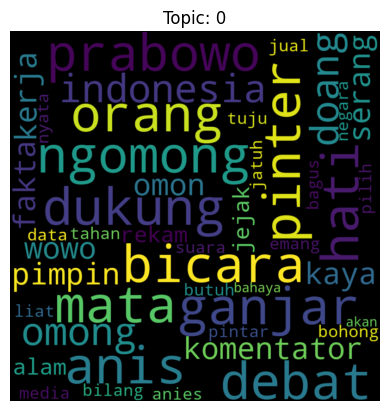

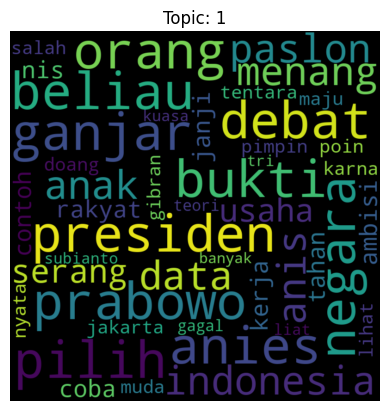

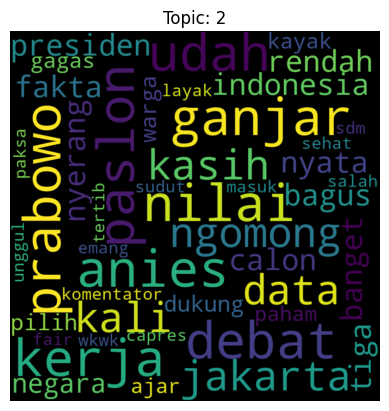

In [12]:
# Plotting a wordcloud of the topics

from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Plotting a word cloud of the topics
for topic_id, topic in enumerate(lda_model.print_topics(num_topics=total_topics, num_words=number_words)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [13]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.110161 -0.008819       1        1  43.571275
2      0.063095 -0.086505       2        1  29.082232
0      0.047066  0.095324       3        1  27.346493, topic_info=          Term       Freq      Total Category  logprob  loglift
65        anis  50.000000  50.000000  Default  30.0000  30.0000
75     prabowo  91.000000  91.000000  Default  29.0000  29.0000
388       udah  12.000000  12.000000  Default  28.0000  28.0000
23       nilai   9.000000   9.000000  Default  27.0000  27.0000
89        hati   8.000000   8.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
76      serang   4.298835  13.154772   Topic3  -5.5194   0.1781
68   indonesia   4.947218  23.119821   Topic3  -5.3789  -0.2453
7        kerja   4.427690  18.459006   Topic3  -5.4899  -0.1311
176       liat   3.789889  10.029010   Topic3  -5.6454   0.3234
84       tahan   3.642373  10.944777   Topic3  -5.6851   0.1964

[213 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1359      2  0.717120     ah
475       2  0.242999   akal
475       3  0.728996   akal
1308      3  0.876810   akan
404       2  0.324035   alam
...     ...       ...    ...
463       2  0.618849   wkwk
572       3  0.876745  wkwkw
427       1  0.239110   wowo
427       2  0.239110   wowo
427       3  0.597775   wowo

[268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])